# 📦 1. Imports and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the fraud dataset
df = pd.read_csv("C:/Users/ajinv/Downloads/fraud_data.csv")

In [3]:
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


## 🔍 2. Data Exploration

In [4]:
df.isnull().sum()  # Check for missing values

transaction_id    0
duration          0
day               0
fraud             0
dtype: int64

In [5]:
df['fraud'].value_counts()  # Distribution of fraud vs non-fraud

fraud
False    8686
True      107
Name: count, dtype: int64

In [6]:
df['day'].value_counts()  # Frequency of days

day
weekend    5757
weekday    3036
Name: count, dtype: int64

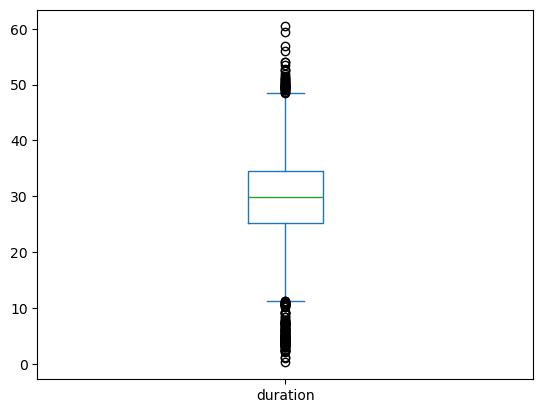

In [7]:
df['duration'].plot(kind='box');  # Check for outliers in duration

## 🧾 3. Data Integrity Checks

In [8]:
# Check for duplicates or transaction inconsistencies
print(df['transaction_id'].nunique())  # Unique transaction IDs
print(len(df))  # Total number of records

8793
8793


## 🏗️ 4. Feature Engineering

In [9]:
# Convert 'day' column into binary 'weekend' feature
df['weekend'] = pd.get_dummies(df['day'])['weekend'].astype(int)

In [10]:
df.head()

,transaction_id,duration,day,fraud,weekend
0,28891,21.302600,weekend,False,1
1,61629,22.932765,weekend,False,1
2,53707,32.694992,weekday,False,0
3,47812,32.784252,weekend,False,1
4,43455,17.756828,weekend,False,1


In [11]:
# Convert 'fraud' column into binary variable
df['fraud_true'] = pd.get_dummies(df['fraud'])[True].astype(int)

In [12]:
df.head()

,transaction_id,duration,day,fraud,weekend,fraud_true
0,28891,21.302600,weekend,False,1,0
1,61629,22.932765,weekend,False,1,0
2,53707,32.694992,weekday,False,0,0
3,47812,32.784252,weekend,False,1,0
4,43455,17.756828,weekend,False,1,0


In [13]:
# Add intercept column for statsmodels
df['intercept'] = 1

In [14]:
df.head()

,transaction_id,duration,day,fraud,weekend,fraud_true,intercept
0,28891,21.302600,weekend,False,1,0,1
1,61629,22.932765,weekend,False,1,0,1
2,53707,32.694992,weekday,False,0,0,1
3,47812,32.784252,weekend,False,1,0,1
4,43455,17.756828,weekend,False,1,0,1


## 📊 5. Logistic Regression Model

In [15]:
import statsmodels.api as sm

In [16]:
# Define logistic regression model with key features
lm = sm.Logit(df['fraud_true'], df[['intercept','duration','weekend']])

In [17]:
lm.fit().summary()

Optimization terminated successfully.
         Current function value: 0.002411
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraud_true   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8790
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.9633
Time:                        11:14:40   Log-Likelihood:                -21.200
converged:                       True   LL-Null:                       -578.10
Covariance Type:            nonrobust   LLR p-value:                1.390e-242
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.4174      2.334      5.320      0.000       7.843      16.992
duration      -1.4637      0.290     -5.039      0.000      -2.033      -0.894
weekend       -2.5465      0.904     -2.816      0.005      -4.319      -0.774
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## 📈 6. Predict Fraud Probability Example

In [18]:
import math

In [19]:
# Calculate probability of fraud for a given duration and weekend status using model coefficients
1 / (1 + math.exp(-12.4174 + 1.4637 * 21.302600 + 2.5465 * 1))

5.562987640646581e-10